In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据

In [90]:
data = pd.read_csv('./tap_fun_train.csv')
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [91]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


# 数据预处理

In [93]:
data.shape

(2288007, 109)

In [94]:
data.isnull().values.any()

False

In [95]:
data['user_id'].duplicated().values.any()

False

In [96]:
data['register_time'] = pd.to_datetime(data['register_time'], format='%Y-%m-%d')

In [97]:
data.rename(columns={'register_time': 'date'})

,user_id,date,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288002,3190526,2018-02-03 14:54:10,15500.0,3700.0,0.0,0.0,0.0,0.0,13000.0,2000.0,...,0,0,0,0,0,0,0.500000,0.0,0,0.0
2288003,3190527,2018-02-03 14:55:21,10000.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,...,0,0,0,0,0,0,0.833333,0.0,0,0.0
2288004,3190528,2018-02-03 14:56:35,131589.0,71287.0,0.0,0.0,6000.0,0.0,249356.0,39524.0,...,0,0,0,2,2,2,4.333333,0.0,0,0.0
2288005,3190529,2018-02-03 14:57:51,221984.0,122401.0,0.0,0.0,0.0,0.0,208184.0,74738.0,...,0,0,0,1,1,1,2.833333,0.0,0,0.0


In [17]:
# 7日内付费的用户
data_7_pay = data[data['pay_price'] > 0]
data_7_pay.shape

(41439, 110)

In [18]:
data_7_pay.shape[0]/data.shape[0]

0.018111395638212645

In [31]:
data_7_pay['date'].value_counts().sort_index().describe()

count      40.000000
mean     1035.975000
std       244.910814
min       666.000000
25%       851.500000
50%      1013.500000
75%      1158.500000
max      1636.000000
Name: date, dtype: float64

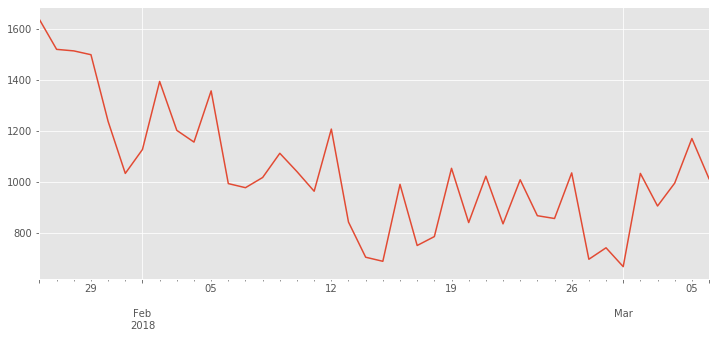

In [20]:
data_7_pay['date'].value_counts().sort_index().plot(figsize = (12,5))

In [33]:
# 非付费用户
data_no_pay = data[data['pay_price'] == 0]

In [34]:
data_no_pay['avg_online_minutes'].describe()

count    2.246568e+06
mean     7.809943e+00
std      2.852353e+01
min      0.000000e+00
25%      5.000000e-01
50%      1.833333e+00
75%      4.500000e+00
max      2.049667e+03
Name: avg_online_minutes, dtype: float64

In [36]:
data_7_pay['pay_price'].describe()

count    41439.000000
mean        29.521143
std        165.655561
min          0.990000
25%          0.990000
50%          1.990000
75%         11.970000
max       7457.950000
Name: pay_price, dtype: float64

In [37]:
data_7_pay['pay_price'].sum()

1223326.66

In [39]:
data_7_pay[['pay_price','prediction_pay_price']]

,pay_price,prediction_pay_price
25,0.99,0.99
40,2.97,4.96
47,12.97,12.97
86,0.99,0.99
119,0.99,0.99
...,...,...
2287944,0.99,0.99
2287946,352.77,932.33
2287960,0.99,20.96
2287970,0.99,0.99


In [43]:
data_7_pay['prediction_pay_price'].describe()

count    41439.000000
mean        94.522940
std        645.678279
min          0.990000
25%          0.990000
50%          3.970000
75%         21.950000
max      32977.810000
Name: prediction_pay_price, dtype: float64

In [44]:
data_7_pay['prediction_pay_price'].sum()

3916936.11

In [22]:
# 45日内付费的用户
data_45_pay = data[data['prediction_pay_price'] > 0]

In [23]:
data_45_pay['prediction_pay_price'].describe()

count    45988.000000
mean        89.213058
std        617.702040
min          0.990000
25%          0.990000
50%          3.970000
75%         20.980000
max      32977.810000
Name: prediction_pay_price, dtype: float64

In [24]:
data_45_pay['prediction_pay_price'].sum()

4102730.1099999994

In [68]:
# 前7天付费，但7天后不再付费的用户
data_churn = data_7_pay[data_7_pay['pay_price']==data_7_pay['prediction_pay_price']]

In [70]:
data_churn['pay_price'].describe()

count    30130.000000
mean        11.407407
std         71.134875
min          0.990000
25%          0.990000
50%          1.980000
75%          5.980000
max       4086.520000
Name: pay_price, dtype: float64

In [49]:
data_7_pay[['pvp_battle_count','pvp_win_count','pvp_lanch_count',
            'pve_battle_count','pve_win_count','pve_lanch_count']].describe()

,pvp_battle_count,pvp_win_count,pvp_lanch_count,pve_battle_count,pve_win_count,pve_lanch_count
count,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000,41439.000000
mean,25.193803,18.292261,17.254495,40.949540,37.394725,40.728710
std,50.899080,44.359919,43.286398,46.900489,44.191835,46.746352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,6.000000,5.000000,5.000000
50%,8.000000,3.000000,2.000000,22.000000,19.000000,22.000000
75%,25.000000,16.000000,15.000000,62.000000,56.000000,62.000000
max,2054.000000,1904.000000,2051.000000,509.000000,488.000000,509.000000


In [50]:
data_no_pay[['pvp_battle_count','pvp_win_count','pvp_lanch_count',
            'pve_battle_count','pve_win_count','pve_lanch_count']].describe()

,pvp_battle_count,pvp_win_count,pvp_lanch_count,pve_battle_count,pve_win_count,pve_lanch_count
count,2.246568e+06,2.246568e+06,2.246568e+06,2.246568e+06,2.246568e+06,2.246568e+06
mean,1.723228e+00,6.645973e-01,7.609175e-01,2.141877e+00,1.914146e+00,2.133394e+00
std,9.007089e+00,6.299155e+00,6.661609e+00,9.901287e+00,9.172114e+00,9.871733e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.303000e+03,1.075000e+03,1.075000e+03,4.020000e+02,3.700000e+02,2.550000e+02


In [52]:
#加速道具分析
#付费用户
data_7_pay_acceleration = data_7_pay[['general_acceleration_add_value','general_acceleration_reduce_value','building_acceleration_add_value',
            'building_acceleration_reduce_value','reaserch_acceleration_add_value',
            'reaserch_acceleration_reduce_value','training_acceleration_add_value',
            'training_acceleration_reduce_value','treatment_acceleraion_add_value',
            'treatment_acceleration_reduce_value']]
#未付费用户
data_no_pay_acceleration = data_no_pay[['general_acceleration_add_value','general_acceleration_reduce_value','building_acceleration_add_value',
            'building_acceleration_reduce_value','reaserch_acceleration_add_value',
            'reaserch_acceleration_reduce_value','training_acceleration_add_value',
            'training_acceleration_reduce_value','treatment_acceleraion_add_value',
            'treatment_acceleration_reduce_value']]

In [56]:
data_7_pay_acceleration.mean()

general_acceleration_add_value         7434.133063
general_acceleration_reduce_value      5677.801805
building_acceleration_add_value        4691.243201
building_acceleration_reduce_value     3841.522986
reaserch_acceleration_add_value        4781.905548
reaserch_acceleration_reduce_value     3351.800309
training_acceleration_add_value        4185.596057
training_acceleration_reduce_value     2680.399020
treatment_acceleraion_add_value         173.387920
treatment_acceleration_reduce_value      16.775767
dtype: float64

In [57]:
data_no_pay_acceleration.mean()

general_acceleration_add_value         150.630243
general_acceleration_reduce_value       90.843659
building_acceleration_add_value        122.816870
building_acceleration_reduce_value      74.550726
reaserch_acceleration_add_value         46.913867
reaserch_acceleration_reduce_value      13.185602
training_acceleration_add_value        137.491640
training_acceleration_reduce_value      16.779663
treatment_acceleraion_add_value          7.410325
treatment_acceleration_reduce_value      0.067320
dtype: float64

In [58]:
# 资源分析
data_7_pay_resource = data_7_pay[['wood_add_value','wood_reduce_value','stone_add_value','stone_reduce_value',
                              'ivory_add_value','ivory_reduce_value','meat_add_value','meat_reduce_value',
                              'magic_add_value','magic_reduce_value']]

data_no_pay_resource = data_no_pay[['wood_add_value','wood_reduce_value','stone_add_value','stone_reduce_value',
                              'ivory_add_value','ivory_reduce_value','meat_add_value','meat_reduce_value',
                              'magic_add_value','magic_reduce_value']]

In [59]:
data_7_pay_resource.mean()

wood_add_value        1.071278e+07
wood_reduce_value     8.986778e+06
stone_add_value       7.716307e+06
stone_reduce_value    5.864581e+06
ivory_add_value       3.527447e+06
ivory_reduce_value    1.932101e+06
meat_add_value        1.383669e+07
meat_reduce_value     8.657003e+06
magic_add_value       1.468633e+06
magic_reduce_value    1.053266e+06
dtype: float64

In [60]:
data_no_pay_resource.mean()

wood_add_value        265084.446909
wood_reduce_value     210899.842744
stone_add_value        50948.427254
stone_reduce_value     31970.650500
ivory_add_value        17180.400602
ivory_reduce_value      1159.663183
meat_add_value        341091.336054
meat_reduce_value     201672.375243
magic_add_value        49690.504534
magic_reduce_value     28697.637635
dtype: float64

In [64]:
# 士兵分析
data_7_pay_sb = data_7_pay[['infantry_add_value','infantry_reduce_value','cavalry_add_value','cavalry_reduce_value',
                            'shaman_add_value','shaman_reduce_value','wound_infantry_add_value','wound_infantry_reduce_value',
                            'wound_cavalry_add_value','wound_cavalry_reduce_value','wound_shaman_add_value',
                            'wound_shaman_reduce_value']]

data_no_pay_sb = data_no_pay[['infantry_add_value','infantry_reduce_value','cavalry_add_value','cavalry_reduce_value',
                            'shaman_add_value','shaman_reduce_value','wound_infantry_add_value','wound_infantry_reduce_value',
                            'wound_cavalry_add_value','wound_cavalry_reduce_value','wound_shaman_add_value',
                            'wound_shaman_reduce_value']]

In [65]:
data_7_pay_sb.mean()

infantry_add_value             3926.537006
infantry_reduce_value          4120.623398
cavalry_add_value              3387.018413
cavalry_reduce_value           3537.397162
shaman_add_value               3481.726031
shaman_reduce_value            3542.951616
wound_infantry_add_value       2452.476218
wound_infantry_reduce_value    2132.920148
wound_cavalry_add_value        2206.781558
wound_cavalry_reduce_value     1904.767465
wound_shaman_add_value         2455.811361
wound_shaman_reduce_value      2148.746326
dtype: float64

In [66]:
data_no_pay_sb.mean()

infantry_add_value              73.832580
infantry_reduce_value          154.958328
cavalry_add_value               68.154618
cavalry_reduce_value           116.039948
shaman_add_value                57.525484
shaman_reduce_value             94.394857
wound_infantry_add_value        92.562170
wound_infantry_reduce_value     54.338107
wound_cavalry_add_value         77.946637
wound_cavalry_reduce_value      50.767683
wound_shaman_add_value          67.169157
wound_shaman_reduce_value       46.691749
dtype: float64

# 用户分类、付费预测

In [47]:
# shuffle the data before creating the subsamples
data = pd.read_csv('./tap_fun_train.csv')
df = data.sample(frac=1)

# amount of pay_45 classes 45988 rows.
pay_df = df.loc[df['prediction_pay_price'] > 0]
nopay_df = df.loc[df['prediction_pay_price'] == 0][:45988]

balanced_df = pd.concat([pay_df, nopay_df])

# Shuffle dataframe rows
new_df = balanced_df.sample(frac=1, random_state=42)
new_df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
724362,905509,2018-02-26 15:02:38,3541838.0,1984176.0,1370000.0,0.0,778000.0,0.0,5303719.0,1986114.0,...,1,0,1,32,32,32,17.000000,2.97,3,3.96
1650027,2230387,2018-02-28 16:21:18,11500.0,10519.0,0.0,0.0,0.0,0.0,11000.0,3059.0,...,17,16,0,0,0,0,51.000000,0.00,0,0.00
804772,1025412,2018-01-31 05:19:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.000000,0.00,0,0.00
1825733,2574039,2018-02-15 04:26:21,90277.0,94699.0,0.0,0.0,0.0,0.0,27057.0,78627.0,...,2,0,0,0,0,0,2.166667,0.00,0,0.00
2072168,2934956,2018-02-20 17:55:16,52324.0,16380.0,0.0,0.0,3000.0,0.0,52111.0,10745.0,...,0,0,0,1,1,1,1.500000,0.00,0,0.00


In [48]:
pay_df['prediction_pay_price'].sort_values(ascending = False)

916364     32977.81
285403     30780.56
1019562    26598.93
2142344    25796.02
1292065    24900.35
             ...   
1396613        0.99
615836         0.99
810362         0.99
121070         0.99
1947799        0.99
Name: prediction_pay_price, Length: 45988, dtype: float64

In [49]:
new_df = new_df.drop(labels=['user_id', 'register_time'], axis=1)

In [50]:
new_df['prediction_pay_price'].describe()

count    91976.000000
mean        44.606529
std        439.050788
min          0.000000
25%          0.000000
50%          0.495000
75%          3.970000
max      32977.810000
Name: prediction_pay_price, dtype: float64

In [51]:
new_df.describe()

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,9.197600e+04,...,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000,91976.000000
mean,5.143542e+06,4.322806e+06,3.566355e+06,2.710347e+06,1.620354e+06,8.737716e+05,6.645405e+06,4.170423e+06,7.224750e+05,5.101854e+05,...,13.203390,8.829325,9.270853,21.400833,21.287314,19.532030,72.727592,13.300499,1.435527,44.606529
std,2.389744e+07,1.778848e+07,2.297593e+07,1.654157e+07,1.093956e+07,8.843474e+06,2.757095e+07,1.595658e+07,3.026119e+06,2.547498e+06,...,37.822357,31.648589,32.447346,38.729848,38.587279,36.219863,124.968809,112.157182,3.245011,439.050788
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.024150e+04,3.700000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.624500e+04,2.000000e+03,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000
50%,4.453265e+05,2.520755e+05,0.000000e+00,0.000000e+00,3.000000e+03,0.000000e+00,5.623790e+05,1.932270e+05,4.152250e+04,3.081000e+03,...,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.495000
75%,5.045694e+06,4.426770e+06,2.354676e+06,1.549579e+06,8.284098e+05,0.000000e+00,7.253322e+06,4.340158e+06,8.088160e+05,5.647568e+05,...,10.000000,3.000000,4.000000,25.000000,24.000000,21.000000,92.000000,1.980000,2.000000,3.970000
max,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.161902e+08,1.831429e+08,...,2054.000000,2051.000000,1904.000000,509.000000,509.000000,488.000000,1674.666667,7457.950000,105.000000,32977.810000


In [52]:
features = list(new_df.columns)[:106]

# Pycaret训练模型

In [62]:
from pycaret.regression import *
model = setup(data = new_df, target = 'prediction_pay_price',
              remove_multicollinearity=True, numeric_features=features, transform_target=True, normalize=True) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,455
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(91976, 107)"
4,Missing Values,False
5,Numeric Features,106
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
compare_models()

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:26:06
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Elastic Net,44.0678,1.883745e+05,424.9495,-1.100000e-02,1.5635,0.6293,0.0874
1,Lasso Regression,44.2867,1.884671e+05,425.0600,-1.150000e-02,1.6857,0.6356,0.0436
2,Lasso Least Angle Regression,44.2867,1.884671e+05,425.0600,-1.150000e-02,1.6857,0.6356,0.0423
3,Orthogonal Matching Pursuit,87.6298,4.069875e+07,3072.8104,-2.684927e+02,1.3770,2.5952,0.0417
4,Least Angle Regression,127.2822,1.575618e+08,6057.1330,-5.525740e+02,1.4303,9.3755,0.0619
5,Ridge Regression,137.6791,2.066460e+08,6197.0629,-9.638441e+02,1.3585,7.0326,0.0352
6,Linear Regression,297.4761,2.849012e+09,18817.0701,-1.342967e+04,1.3587,20.9226,0.0947
7,Bayesian Ridge,273.7265,1.220575e+09,15586.2435,-1.479838e+04,1.3582,9.6075,0.1356
8,Passive Aggressive Regressor,2376.9638,2.046292e+11,185131.4809,-1.516196e+06,1.6844,392.1292,0.1679


ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [64]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [65]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,39.0181,152846.3775,390.9557,-0.0097,1.6758,0.6391
1,42.5986,141312.2912,375.9153,-0.0125,1.6850,0.6305
2,39.8202,74976.0318,273.8175,-0.0207,1.6950,0.6308
3,45.2830,143479.9494,378.7875,-0.0140,1.6752,0.6281
4,52.2591,314421.3816,560.7329,-0.0085,1.7051,0.6357
5,45.8533,288417.5078,537.0452,-0.0071,1.6498,0.6323
6,39.0962,137714.2923,371.0988,-0.0108,1.6718,0.6282
7,46.2534,280653.3501,529.7673,-0.0074,1.6958,0.6470
8,48.7429,214196.5600,462.8137,-0.0108,1.6990,0.6389
9,43.9422,136652.7765,369.6658,-0.0138,1.7043,0.6450


In [67]:
lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37.7742,150688.2279,388.1858,0.0046,1.3114,0.7184
1,49.0338,450494.2519,671.1887,-2.2278,1.3244,0.7684
2,42.4382,173518.6043,416.5556,-1.3623,1.3245,0.7352
3,44.1416,141430.8106,376.0729,0.0005,1.3219,0.7148
4,55.4777,431941.7482,657.2228,-0.3854,1.3493,0.7818
5,46.6029,308115.5691,555.0816,-0.0759,1.2890,0.7224
6,37.5968,135458.3742,368.0467,0.0058,1.3077,0.7168
7,45.1441,279311.8047,528.4996,-0.0026,1.3312,0.7249
8,47.1753,211426.7378,459.8116,0.0022,1.3346,0.7190
9,42.6161,135218.7746,367.7211,-0.0032,1.3141,0.7274


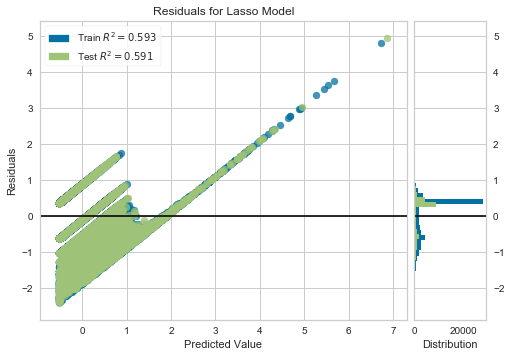

In [68]:
plot_model(lasso)

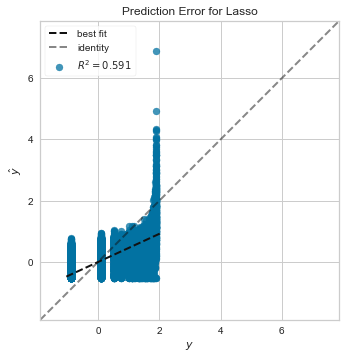

In [69]:
plot_model(lasso, plot = 'error')

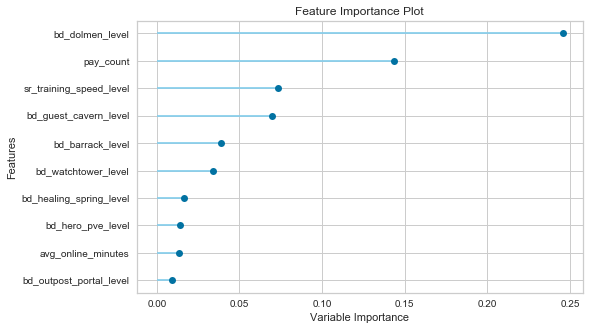

In [71]:
plot_model(lasso, plot='feature')

In [73]:
test = pd.read_csv('./tap_fun_test.csv')
test = test.drop(labels=['user_id', 'register_time'], axis=1)

In [74]:
predictions = predict_model(lasso, data=test)
predictions.head()

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,wound_cavalry_reduce_value,wound_shaman_add_value,wound_shaman_reduce_value,general_acceleration_add_value,general_acceleration_reduce_value,building_acceleration_add_value,building_acceleration_reduce_value,reaserch_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,bd_watchtower_level,bd_magic_coin_tree_level,bd_hall_of_war_level,bd_market_level,bd_hero_gacha_level,bd_hero_strengthen_level,bd_hero_pve_level,sr_scout_level,sr_training_speed_level,sr_infantry_tier_2_level,sr_cavalry_tier_2_level,sr_shaman_tier_2_level,sr_infantry_atk_level,sr_cavalry_atk_level,sr_shaman_atk_level,sr_infantry_tier_3_level,sr_cavalry_tier_3_level,sr_shaman_tier_3_level,sr_troop_defense_level,sr_infantry_def_level,sr_cavalry_def_level,sr_shaman_def_level,sr_infantry_hp_level,sr_cavalry_hp_level,sr_shaman_hp_level,sr_infantry_tier_4_level,sr_cavalry_tier_4_level,sr_shaman_tier_4_level,sr_troop_attack_level,sr_construction_speed_level,sr_hide_storage_level,sr_troop_consumption_level,sr_rss_a_prod_levell,sr_rss_b_prod_level,sr_rss_c_prod_level,sr_rss_d_prod_level,sr_rss_a_gather_level,sr_rss_b_gather_level,sr_rss_c_gather_level,sr_rss_d_gather_level,sr_troop_load_level,sr_rss_e_gather_level,sr_rss_e_prod_level,sr_outpost_durability_level,sr_outpost_tier_2_level,sr_healing_space_level,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,Label
0,166415.0,138362.0,0,0,0,0,258522,90142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,252,21,60,0,185,0,5,0,1,4,4,1,2,1,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.000000,0.0,0,0.2775
1,10000.0,600.0,0,0,0,0,10000,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.0,0,0.2549
2,10000.0,3700.0,0,0,0,0,10000,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.000000,0.0,0,0.2564
3,210000.0,0.0,200000,0,200000,0,610000,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.666667,0.0,0,0.2468
4,11500.0,3700.0,0,0,0,0,11000,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0.0,0,0.2549
